In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing and model selection tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Import Linear Regression models and metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import Logistic Regression (for classification tasks if needed)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Import additional useful tools
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
# Load the house sales dataset
df = pd.read_csv('house_sales_data.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1000, 17)

First few rows:


,Square_Footage,Bedrooms,Bathrooms,Age,Garage_Spaces,Lot_Size,Floors,Neighborhood_Rating,Condition,School_Rating,Has_Pool,Renovated,Location_Type,Distance_To_Center_KM,Days_On_Market,Price,Sold_Within_Week
0,3974,6,2.0,12,0.0,11043.0,2,1,4,1.0,0,1,Suburban,10.40,6.0,795000,1
1,4307,2,2.5,44,3.0,9493.0,1,5,6,6.0,1,0,Suburban,3.45,1.0,1024000,1
2,1660,4,3.0,31,2.0,6103.0,2,5,5,9.0,1,1,Suburban,43.81,136.0,700000,0
3,2094,4,2.5,33,2.0,4076.0,2,6,1,3.0,0,0,Urban,4.70,5.0,672000,1
4,1930,3,1.5,44,1.0,7231.0,1,8,6,3.0,0,0,Suburban,13.09,48.0,638000,0


Null values count per column:
Square_Footage            0
Bedrooms                  0
Bathrooms                 0
Age                       0
Garage_Spaces            26
Lot_Size                 26
Floors                    0
Neighborhood_Rating       0
Condition                 0
School_Rating            32
Has_Pool                  0
Renovated                 0
Location_Type             0
Distance_To_Center_KM     0
Days_On_Market           28
Price                     0
Sold_Within_Week          0
dtype: int64


Total null values in dataset: 112
Percentage of null values: 0.66%


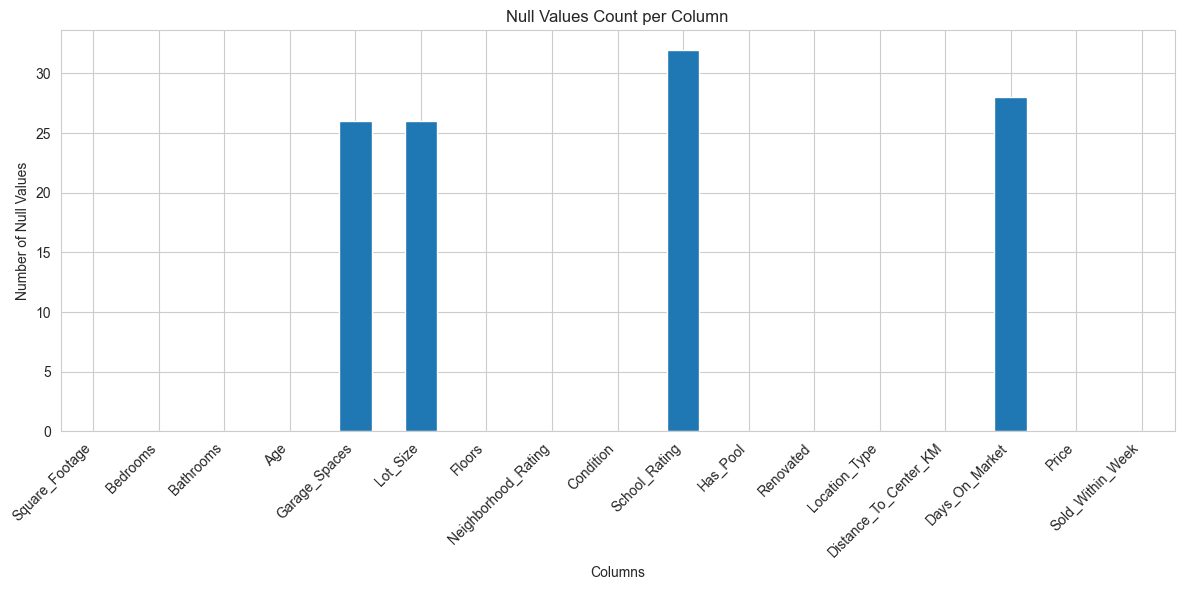

In [4]:
# Check for null values in the dataset
print("Null values count per column:")
print(df.isnull().sum())
print("\n" + "="*50)
print(f"\nTotal null values in dataset: {df.isnull().sum().sum()}")
print(f"Percentage of null values: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Visualize null values if any exist
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    df.isnull().sum().plot(kind='bar')
    plt.title('Null Values Count per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Null Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No null values found in the dataset!")

In [5]:
# Separate features (X) and target variable (y)
# Target column is 'Price' for house price prediction
X = df.drop(['Price'], axis=1)
y = df['Price']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\nFeature columns: {X.shape[1]}")
print(f"Target column: Price")

Training set size: 700 samples (70.0%)
Testing set size: 300 samples (30.0%)

Feature columns: 16
Target column: Price
